In [1]:
!pip install pydub

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from pydub import AudioSegment
from pydub.playback import play

In [24]:
from google.colab import drive

drive.mount('/content/gdrive')
root_dir = 'gdrive/My Drive/'  #EM_Project/

Mounted at /content/gdrive


## Frequency Characteristic

In [25]:
fs=44.1e3 #48e3 #8e3

In [26]:
freq=[20,50,100,200,500,1000,2000,5000,10000,20000]
sound=[]
for i in freq:
  sound.append(AudioSegment.from_mp3(root_dir+str(i)+"Hz.mp3"))
  sound[-1] = sound[-1].get_array_of_samples()
  sound[-1] = np.array(sound[-1])
  n=len(sound[-1])
  sound[-1]=sound[-1][int(0.05*n):]

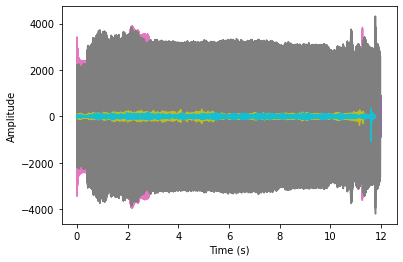

In [27]:
for i in range(len(freq)):
  samples=sound[i]
  n=len(samples)
  np.shape(samples)

  t=np.arange(0,n)/fs

  plt.plot(t,samples)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

20 Hz


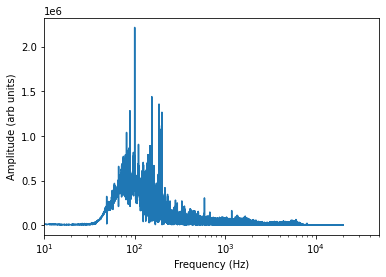

50 Hz


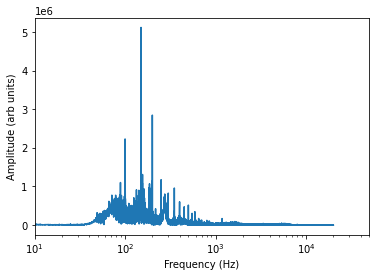

100 Hz


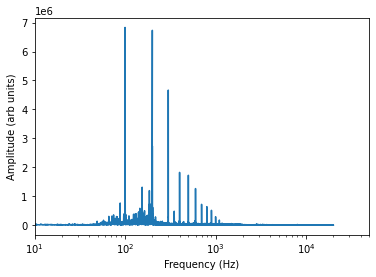

200 Hz


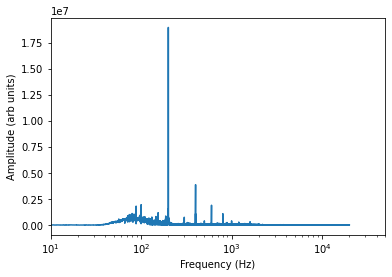

500 Hz


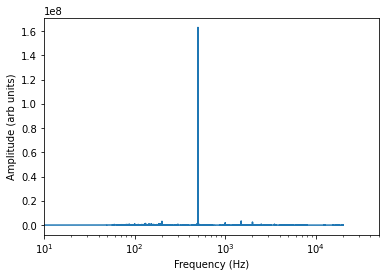

1000 Hz


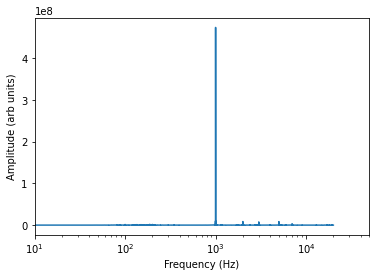

2000 Hz


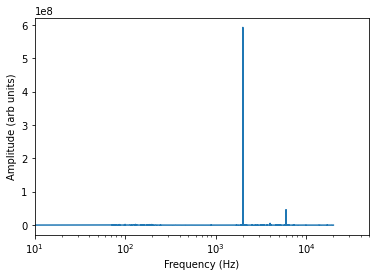

5000 Hz


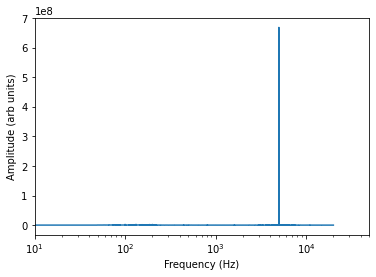

10000 Hz


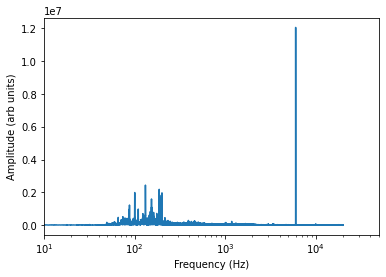

20000 Hz


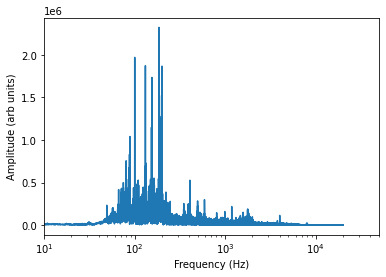

In [28]:
fourier=[]
for i in range(len(freq)):
  samples=sound[i]
  n=len(samples)

  x=np.arange(0/n,20e3,fs/n)

  fourier.append(np.abs(np.fft.fft(samples)))
  fourier[-1]=fourier[-1][:len(x)]

  plt.semilogx(x,fourier[-1])
  plt.xlim((10,50000))
  #plt.ylim((0,1e5))  
  print(freq[i],"Hz")
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Amplitude (arb units)')
  plt.show()

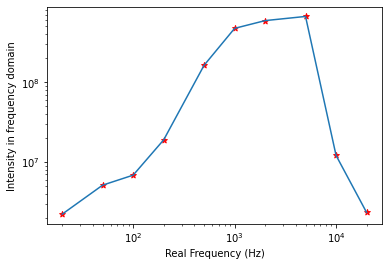

In [29]:
strength=[]
for i in range(len(freq)):
  strength.append(np.max(fourier[i]))

plt.scatter(freq,strength,c='r',marker='*')
plt.xlabel('Real Frequency (Hz)')
plt.ylabel('Intensity in frequency domain')
plt.loglog(freq,strength)
plt.show()

99.94163979399274
150.03636318429608
99.97043169722059
199.99106121281466
500.0370027752081
1000.0114948351172
2000.0279474112967
5000.0401062437095
5999.980889056994
185.6163434903047


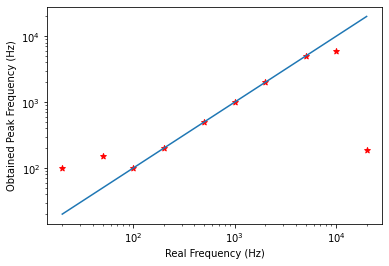

In [30]:
for i in range(len(freq)):
  n=len(sound[i])
  x=np.arange(0/n,20e3,fs/n)

  plt.scatter(freq[i],x[np.argmax(fourier[i])],c='r',marker='*')

  plt.xlabel('Real Frequency (Hz)')
  plt.ylabel('Obtained Peak Frequency (Hz)')
plt.loglog(freq,freq)
plt.show()

## Beats

In [45]:
#sound = AudioSegment.from_file(root_dir+"1000 Hz.aac") 
#sound = AudioSegment.from_wav(root_dir+"1000Hz.wav") 
back = AudioSegment.from_mp3(root_dir+"Background.mp3") 
s1 = AudioSegment.from_mp3(root_dir+"1000Hz1.mp3") 
s2 = AudioSegment.from_mp3(root_dir+"1001Hz2.mp3") 
s12 = AudioSegment.from_mp3(root_dir+"Beat1.mp3")
s21 = AudioSegment.from_mp3(root_dir+"Beat2.mp3")

In [103]:
s12

In [150]:
samples = back.get_array_of_samples()
samples = np.array(samples)

In [151]:
n=len(samples)
fs=44.1e3 #48e3 #8e3

In [152]:
samples=samples[int(0.05*n):int(0.95*n)]
n=len(samples)
np.shape(samples)

(1204761,)

Text(0, 0.5, 'Amplitude')

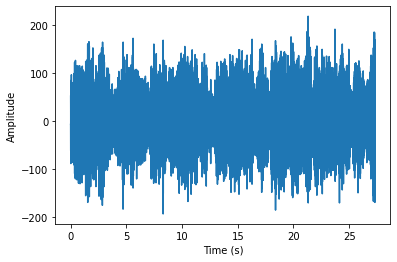

In [153]:
t=np.arange(0,n)/fs

plt.plot(t,samples)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [155]:
x=np.arange(0/n,20e3,fs/n)

In [156]:
#samples_smooth=gaussian_filter1d(samples, 10)

In [157]:
fourier=np.abs(np.fft.fft(samples))
fourier=fourier[:len(x)]

(0.0, 80000.0)

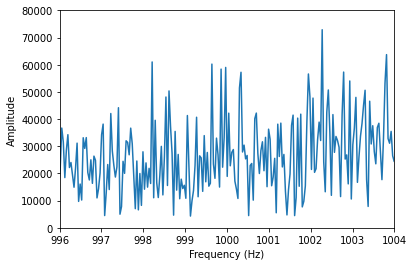

In [165]:
plt.plot(x,fourier)
plt.xlim((996,1004))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.ylim((0,8e4))

In [159]:
x[np.argmax(fourier)]

186.50130606817453